In [3]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd
import numpy

In [5]:
imbalanced_data = pd.read_csv('/content/imbalanced_data.csv')

In [6]:
imbalanced_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

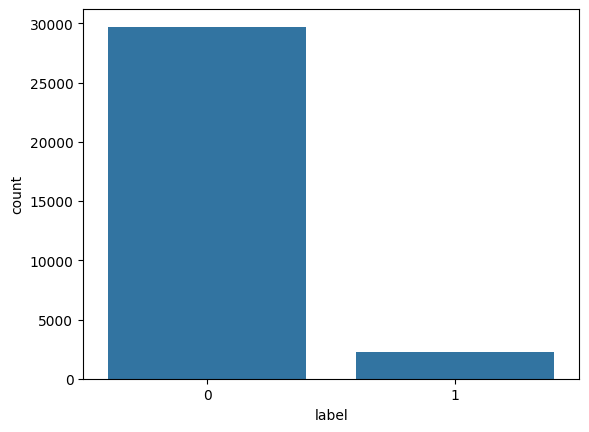

In [8]:
sns.countplot(data = imbalanced_data, x= 'label')

- 0 ---> No hate
- 1 ---> Hate

Data set is imbalanced

In [9]:
imbalanced_data.shape

(31962, 3)

In [10]:
imbalanced_data.isna().sum()

,0
id,0
label,0
tweet,0


In [11]:
imbalanced_data.drop('id', inplace=True, axis=1)

In [12]:
raw_data = pd.read_csv('/content/raw_data.csv')

In [13]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data.shape

(24783, 7)

In [15]:
raw_data.isna().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [16]:
raw_data.drop(['Unnamed: 0', 'count', 'hate_speech', 'neither', 'offensive_language'], axis = 1, inplace=True)

In [17]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
# Lets check for the unique values in the dataset
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

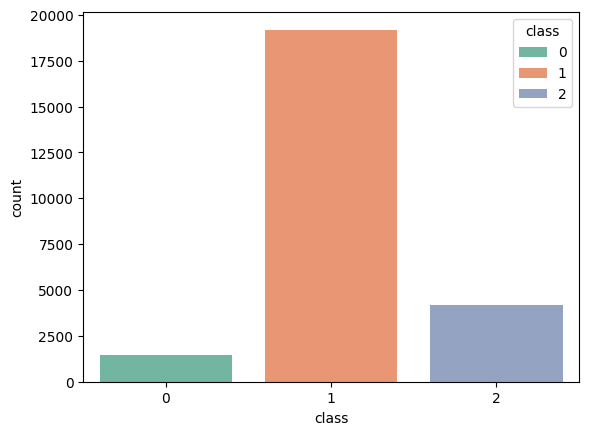

In [19]:
sns.countplot(data = raw_data, x= 'class', hue='class', palette='Set2')

- 0 --->  hate
- 1 ---> Abusive
- 2 ---> no hate

In [20]:
raw_data[raw_data['class'] == 0]['class'] =1

<ipython-input-20-0ccd9191493d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class'] == 0]['class'] =1


In [21]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
raw_data['class'].unique()

array([2, 1, 0])

In [23]:
raw_data['class'].replace({0:1},inplace= True )

In [24]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

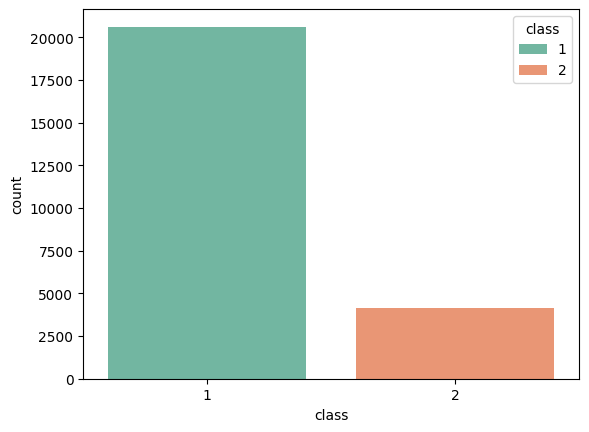

In [25]:
sns.countplot(data = raw_data, x= 'class', hue='class', palette='Set2')

In [26]:
# let's replace value 2 to 0
raw_data['class'].replace({2:0},inplace= True )

In [27]:
raw_data.rename(columns={'class':'label'}, inplace=True)

In [28]:
# merge both dataset
df = pd.concat([imbalanced_data, raw_data])

In [29]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [30]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

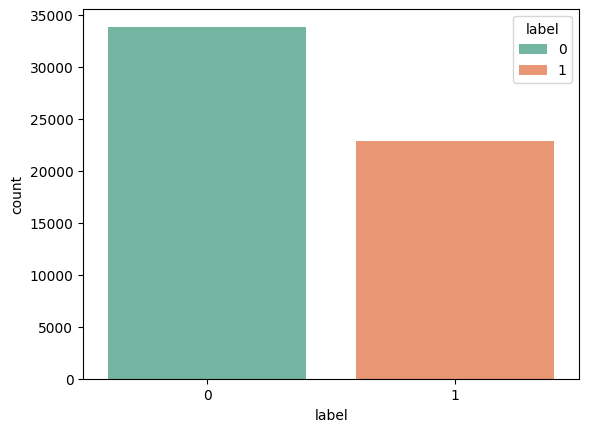

In [31]:
sns.countplot(data = df, x= 'label', hue='label', palette='Set2')

## Preprocessing

In [32]:
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))


In [34]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words


In [35]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [36]:
df['tweet'][1]

,tweet
1,user user thanks for lyft credit i cant use ca...
1,rt boy dats coldtyga dwn bad for cuffin dat ...


In [37]:
X = df['tweet']
y = df['label']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))


42558 42558
14187 14187


## Feature Engineering


In [40]:
# !pip install keras-preprocessing
!pip install tensorflow

In [41]:
# !pip install keras-preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [43]:
sequences_matrix[0].shape

(300,)

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [49]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [52]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

266/266 ━━━━━━━━━━━━━━━━━━━━ 155s 555ms/step - accuracy: 0.8439 - loss: 0.3643 - val_accuracy: 0.9347 - val_loss: 0.1869


In [53]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [54]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.9267 - loss: 0.1942


In [55]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step


In [56]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
print(confusion_matrix(y_test,res))

[[7926  527]
 [ 516 5218]]


In [59]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [60]:
import keras

In [63]:

# Let's save the mdoel.
model.save("model.h5")

In [64]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [66]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [68]:
test=[clean_text(test)]
print(test)

i love this movie
i love this movie
['love movi']


In [69]:
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)

In [73]:
seq

[[28, 5906]]

In [72]:
padded.shape

(1, 300)

In [74]:
pred = load_model.predict(padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


In [75]:
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


pred [[0.26940104]]
no hate
